Eploratory Data Analysis (EDA):
Perform exploratory data analysis to understand the structure of the dataset.
Check for missing values, outliers, and inconsistencies in the data.
Visualize the distribution of features, including histograms, box plots, and correlation matrices.

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# to read just one sheet to dataframe:
df1 = pd.read_excel('/content/heart_disease.xlsx', sheet_name="Heart_disease")
df1.head()
df2= pd.read_excel('/content/heart_disease.xlsx', sheet_name="Description")
df2.head()

,age,Age in years
0,Gender,"Gender ; Male - 1, Female -0"
1,cp,Chest pain type
2,trestbps,Resting blood pressure
3,chol,cholesterol measure
4,fbs,(fasting blood sugar > 120 mg/dl) (1 = true; 0...


In [99]:
df1.shape

(908, 13)

In [100]:
df1.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

In [101]:
# Summary statistics
df1.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [102]:
df1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [103]:
# Check for missing values
print(df1.isnull().sum())

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64


Visualize Distribution of Features
Visualize the distribution of numerical features using histograms and box plots.

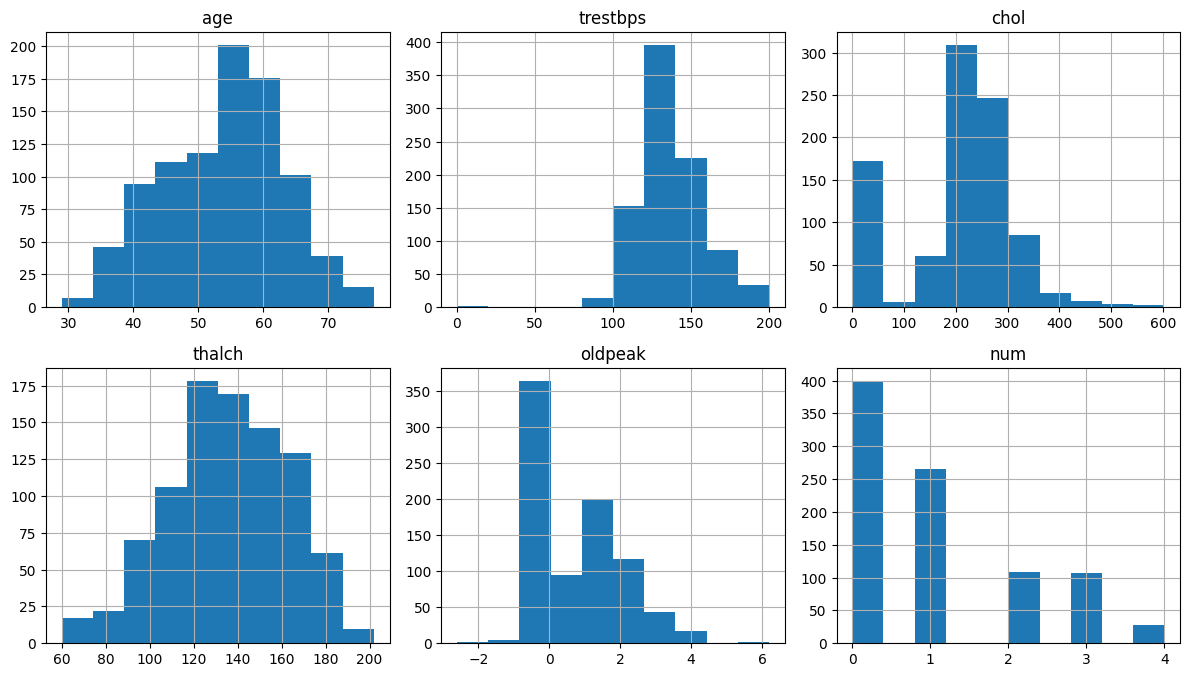

In [104]:
# Select numerical columns from heart disease DataFrame
numerical_columns = df1.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms for numerical columns
plt.figure(figsize=(12, 10))
for i, col in enumerate(numerical_columns):
    plt.subplot(3, 3, i + 1)  # Adjust subplot layout as per your number of numerical columns
    df1[col].hist()
    plt.title(col)
plt.tight_layout()
plt.show()

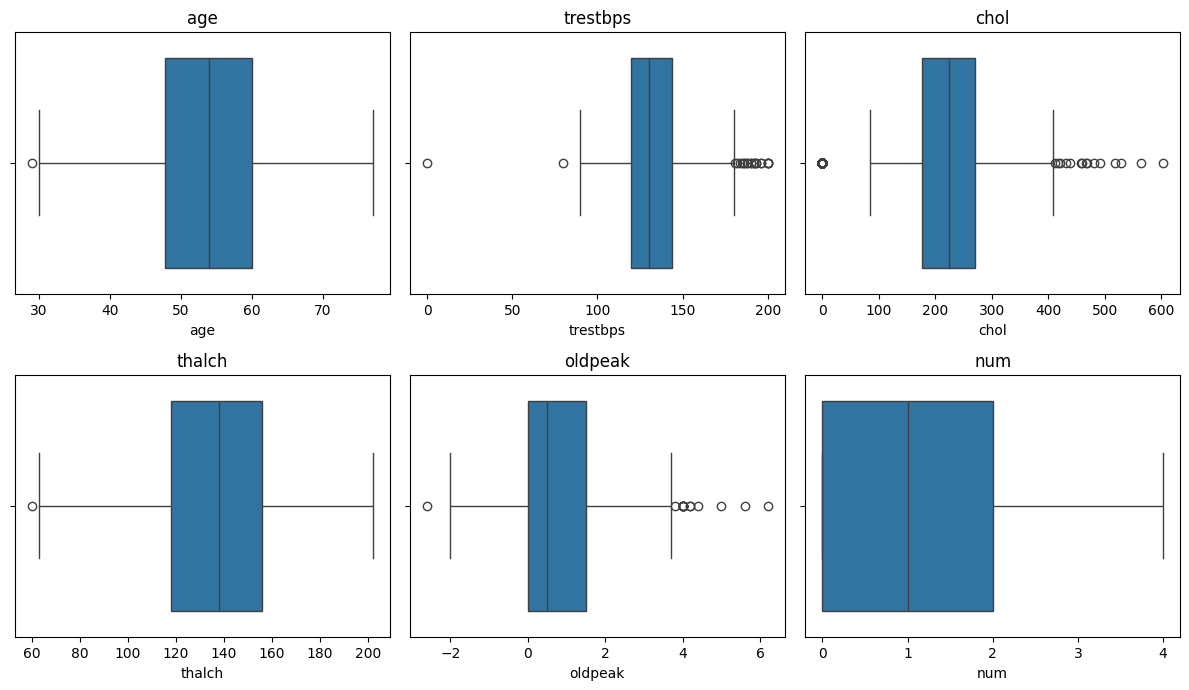

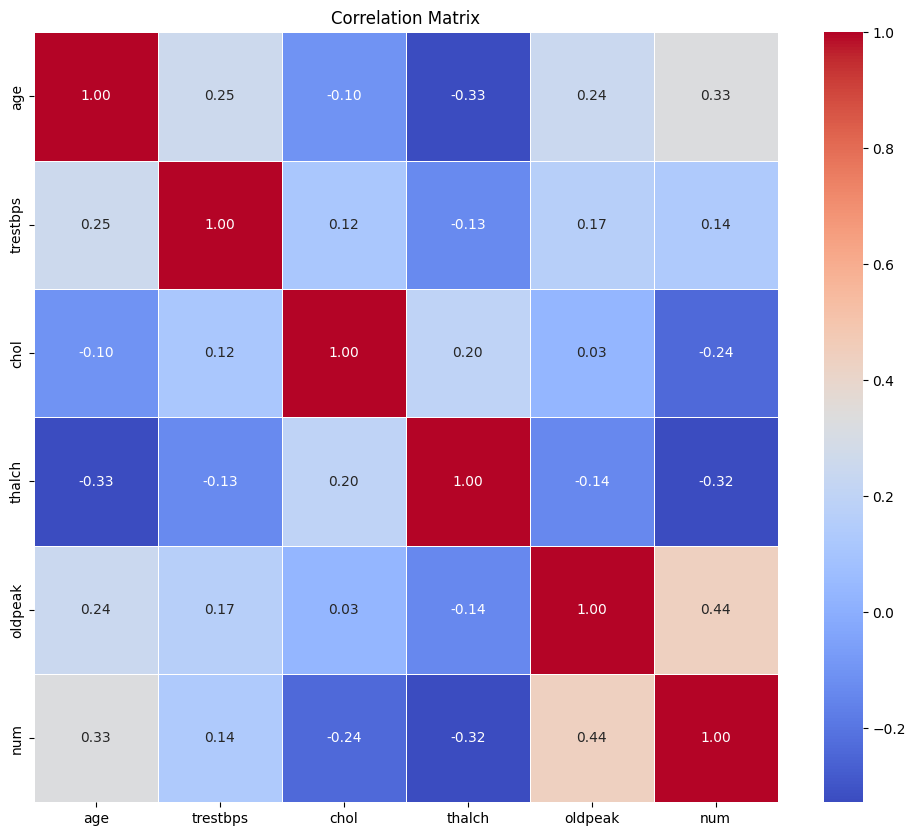

In [105]:
# Plot box plots for numerical columns
plt.figure(figsize=(12, 10))
for i, col in enumerate(numerical_columns):
    plt.subplot(3, 3, i + 1)  # Adjust subplot layout as per your number of numerical columns
    sns.boxplot(x=df1[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# Compute correlation matrix
corr_matrix = df1[numerical_columns].corr()

# Visualize correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [106]:
# Calculate IQR for numerical columns
Q1 = df1[numerical_columns].quantile(0.25)
Q3 = df1[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Check for outliers
outliers = ((df1[numerical_columns] < lower_bound) | (df1[numerical_columns] > upper_bound)).any(axis=1)
print("Rows with outliers:")
print(df1[outliers])

Rows with outliers:
     age     sex               cp  trestbps  chol    fbs         restecg  \
74    65  Female      non-anginal       140   417   True  lv hypertrophy   
134   29    Male  atypical angina       130   204  False  lv hypertrophy   
147   43  Female      non-anginal       150   439  False          normal   
149   59    Male   typical angina       178   270  False  lv hypertrophy   
152   56    Male      non-anginal       120     0  False          normal   
..   ...     ...              ...       ...   ...    ...             ...   
899   65    Male     asymptomatic       136   248  False          normal   
900   61    Male     asymptomatic       190   287   True  lv hypertrophy   
901   51    Male     asymptomatic       110     0   True          normal   
903   53    Male     asymptomatic       125     0  False          normal   
905   56    Male      non-anginal       170     0  False  lv hypertrophy   

     thalch  exang  oldpeak        slope               thal  num  


In [107]:
# Example checking for inconsistencies value counts for categorical columns
categorical_columns = df1.select_dtypes(include=['object']).columns

for col in categorical_columns:
    print(f"Column: {col}")
    print(df1[col].value_counts())


Column: sex
sex
Male      718
Female    190
Name: count, dtype: int64
Column: cp
cp
asymptomatic       495
non-anginal        203
atypical angina    165
typical angina      45
Name: count, dtype: int64
Column: restecg
restecg
normal              542
lv hypertrophy      187
st-t abnormality    179
Name: count, dtype: int64
Column: exang
exang
False    516
True     337
TURE      36
FALSE     19
Name: count, dtype: int64
Column: slope
slope
flat           453
upsloping      298
downsloping    157
Name: count, dtype: int64
Column: thal
thal
normal               386
reversable defect    346
fixed defect         176
Name: count, dtype: int64


In [108]:
# Encoding categorical variable
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Assuming df is your dataframe with categorical columns
# Perform one-hot encoding for categorical variables with less than 5 categories
categorical_cols = df1.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if len(df1[col].unique()) < 5:
        df = pd.get_dummies(df1, columns=[col])

# Perform label encoding for categorical variables with more than 5 categories
for col in categorical_cols:
    if len(df1[col].unique()) > 5:
        le = LabelEncoder()
        df1[col] = le.fit_transform(df1[col])

In [109]:
# Assuming numerical_columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df1[numerical_columns] = scaler.fit_transform(df1[numerical_columns])

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
# Check for NaN values in  dataset
print(df1.isnull().sum())


# Initialize the imputer with strategy (mean, median, mode) depending on  dataset
imputer = SimpleImputer(strategy='mean')  # Example with mean imputation



age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64


In [111]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



# Assuming 'restecg' is  target variable and df1 contains all features
X = df1.drop('restecg', axis=1)
# Fit and transform the imputer on your dataset


# Select numerical columns from heart disease DataFrame
numerical_columns = df1.select_dtypes(include=['int64', 'float64']).columns
X=df1[numerical_columns]
X_imputed = imputer.fit_transform(X)
y = df1['restecg']

# Assuming 'target' is your target variable and X_imputed is the dataset after imputation
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Initialize DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model on the training set
dt_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.49


In [112]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Perform Grid Search CV
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best Parameters found:")
print(grid_search.best_params_)
print(f"Best Accuracy: {grid_search.best_score_:.2f}")

# Use the best model from Grid Search CV
best_dt_classifier = grid_search.best_estimator_

# Predictions on the test set
y_pred_tuned = best_dt_classifier.predict(X_test)

# Evaluate the tuned model
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f"Tuned Model Accuracy: {accuracy_tuned:.2f}")

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters found:
{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2}
Best Accuracy: 0.54
Tuned Model Accuracy: 0.50


In [113]:
#  Model Evaluation
# Use the best model from Grid Search CV
best_dt_classifier = grid_search.best_estimator_

# Predictions on the test set
y_pred_tuned = best_dt_classifier.predict(X_test)

# Evaluate the tuned model
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f"Tuned Model Accuracy: {accuracy_tuned:.2f}")

# Classification report and confusion matrix for tuned model
print("\nClassification Report (Tuned Model):")
print(classification_report(y_test, y_pred_tuned))

print("\nConfusion Matrix (Tuned Model):")
print(confusion_matrix(y_test, y_pred_tuned))

Tuned Model Accuracy: 0.50

Classification Report (Tuned Model):
                  precision    recall  f1-score   support

  lv hypertrophy       0.33      0.23      0.27        39
          normal       0.59      0.67      0.63       110
st-t abnormality       0.27      0.24      0.25        33

        accuracy                           0.50       182
       macro avg       0.40      0.38      0.39       182
    weighted avg       0.48      0.50      0.49       182


Confusion Matrix (Tuned Model):
[[ 9 27  3]
 [17 74 19]
 [ 1 24  8]]


In [114]:
# Assuming y_test and y_pred_tuned are your true labels and predicted labels, respectively
accuracy = accuracy_score(y_test, y_pred_tuned)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.50


In [115]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_tuned)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 9 27  3]
 [17 74 19]
 [ 1 24  8]]


# Visualization of Decision Tree

In [119]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
numeric_columns = df1.select_dtypes(include=['number']).columns.tolist()
df_numeric = df1[numeric_columns]

print("DataFrame with only numeric columns:")
# Impute missing values with mean

df_filled = df_numeric.fillna(df_numeric.mean())
print(df_filled)


DataFrame with only numeric columns:
          age  trestbps      chol    thalch       oldpeak       num
0    1.006027  0.567394  0.281297  0.524183  1.288612e+00 -0.881977
1   -1.397560  0.076967  0.013526 -0.147705 -8.152487e-01 -0.881977
2    0.350503  0.322181 -0.084656  0.449529 -4.493599e-01 -0.881977
3   -0.195767 -0.756760 -0.138211  2.017268 -8.152487e-01 -0.881977
4    0.350503 -1.149102 -0.004325 -0.371668  5.568343e-01 -0.881977
..        ...       ...       ...       ...           ...       ...
903 -0.086513 -0.413461 -1.798388 -0.595631  5.568343e-01  2.615119
904  0.896773  1.597292 -0.281021 -0.595631  1.928917e+00  2.615119
905  0.241249  1.793463 -1.798388 -0.483649  1.471556e+00  2.615119
906  0.241249  0.518352  0.058155 -1.155538  1.343816e-16  2.615119
907  0.350503  0.420266  0.674027  1.718651  1.343816e-16  2.615119

[908 rows x 6 columns]


In [120]:


# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)

# Convert float columns to integers
df_int = df_filled.astype(int)
df_int.info()
X = df_int.drop('num', axis=1)  # Features (excluding the target variable 'income')
y = df_int['num']  # Target variable
# Fit the classifier on the data
dt_classifier.fit(X, y)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       908 non-null    int64
 1   trestbps  908 non-null    int64
 2   chol      908 non-null    int64
 3   thalch    908 non-null    int64
 4   oldpeak   908 non-null    int64
 5   num       908 non-null    int64
dtypes: int64(6)
memory usage: 42.7 KB


DecisionTreeClassifier(max_depth=3, random_state=42)

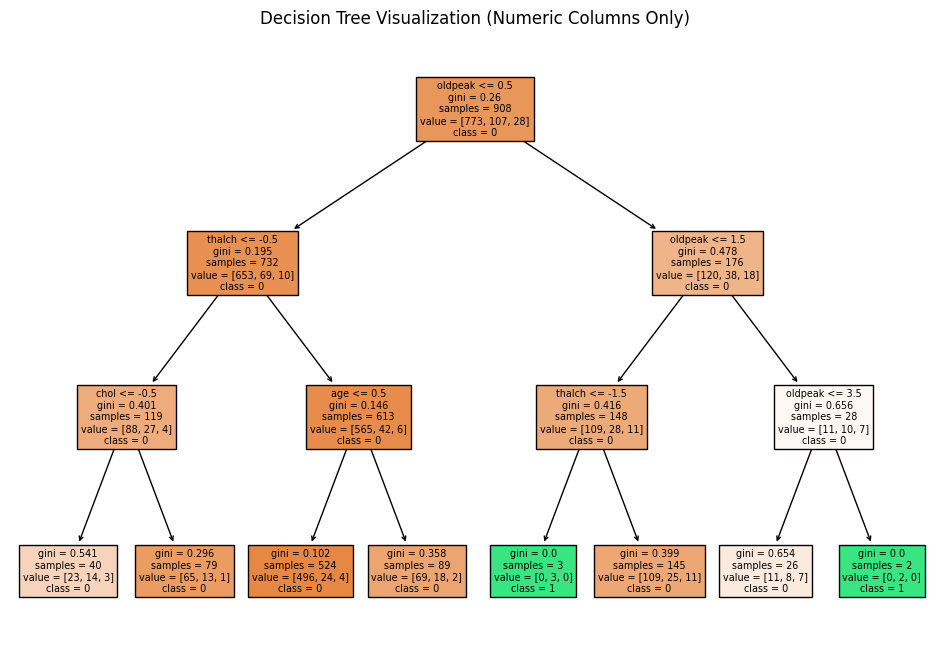

In [121]:
plt.figure(figsize=(12, 8))
plot_tree(dt_classifier, feature_names=X.columns, class_names=['0', '1'], filled=True)
plt.title("Decision Tree Visualization (Numeric Columns Only)")
plt.show()